In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents
1. [Computational Graphs](#section1)
2. [Stochastic Gradient Descent (SGD)](#section2)
3. [Logistic Regression](#section3)
4. [Linear Regression](#section4)
5. [Fully Connected (Dense) Layer](#section5)
6. [Convolutional Layer](#section6)

# <a id="section1"></a>
# 1. Computational Graphs

A **computational graph** represents mathematical operations as a graph of nodes (operations) and edges (flow of data). This structure allows us to perform a forward pass (compute outputs) and then automatically compute gradients via a backward pass.

In this section, we'll look at a simple function:

$$ f(y,b) = y \;+\; b. $$

 - **Forward pass**: compute \(f(y,b)\).
 - **Backward pass**: compute $$ \frac{\partial f}{\partial y} \text{ and } \frac{\partial f}{\partial b}$$


# **Worked Example:**

Below is a fully implemented forward/backward for \(f(y,b)\). Run the cell to see the forward output and gradients.



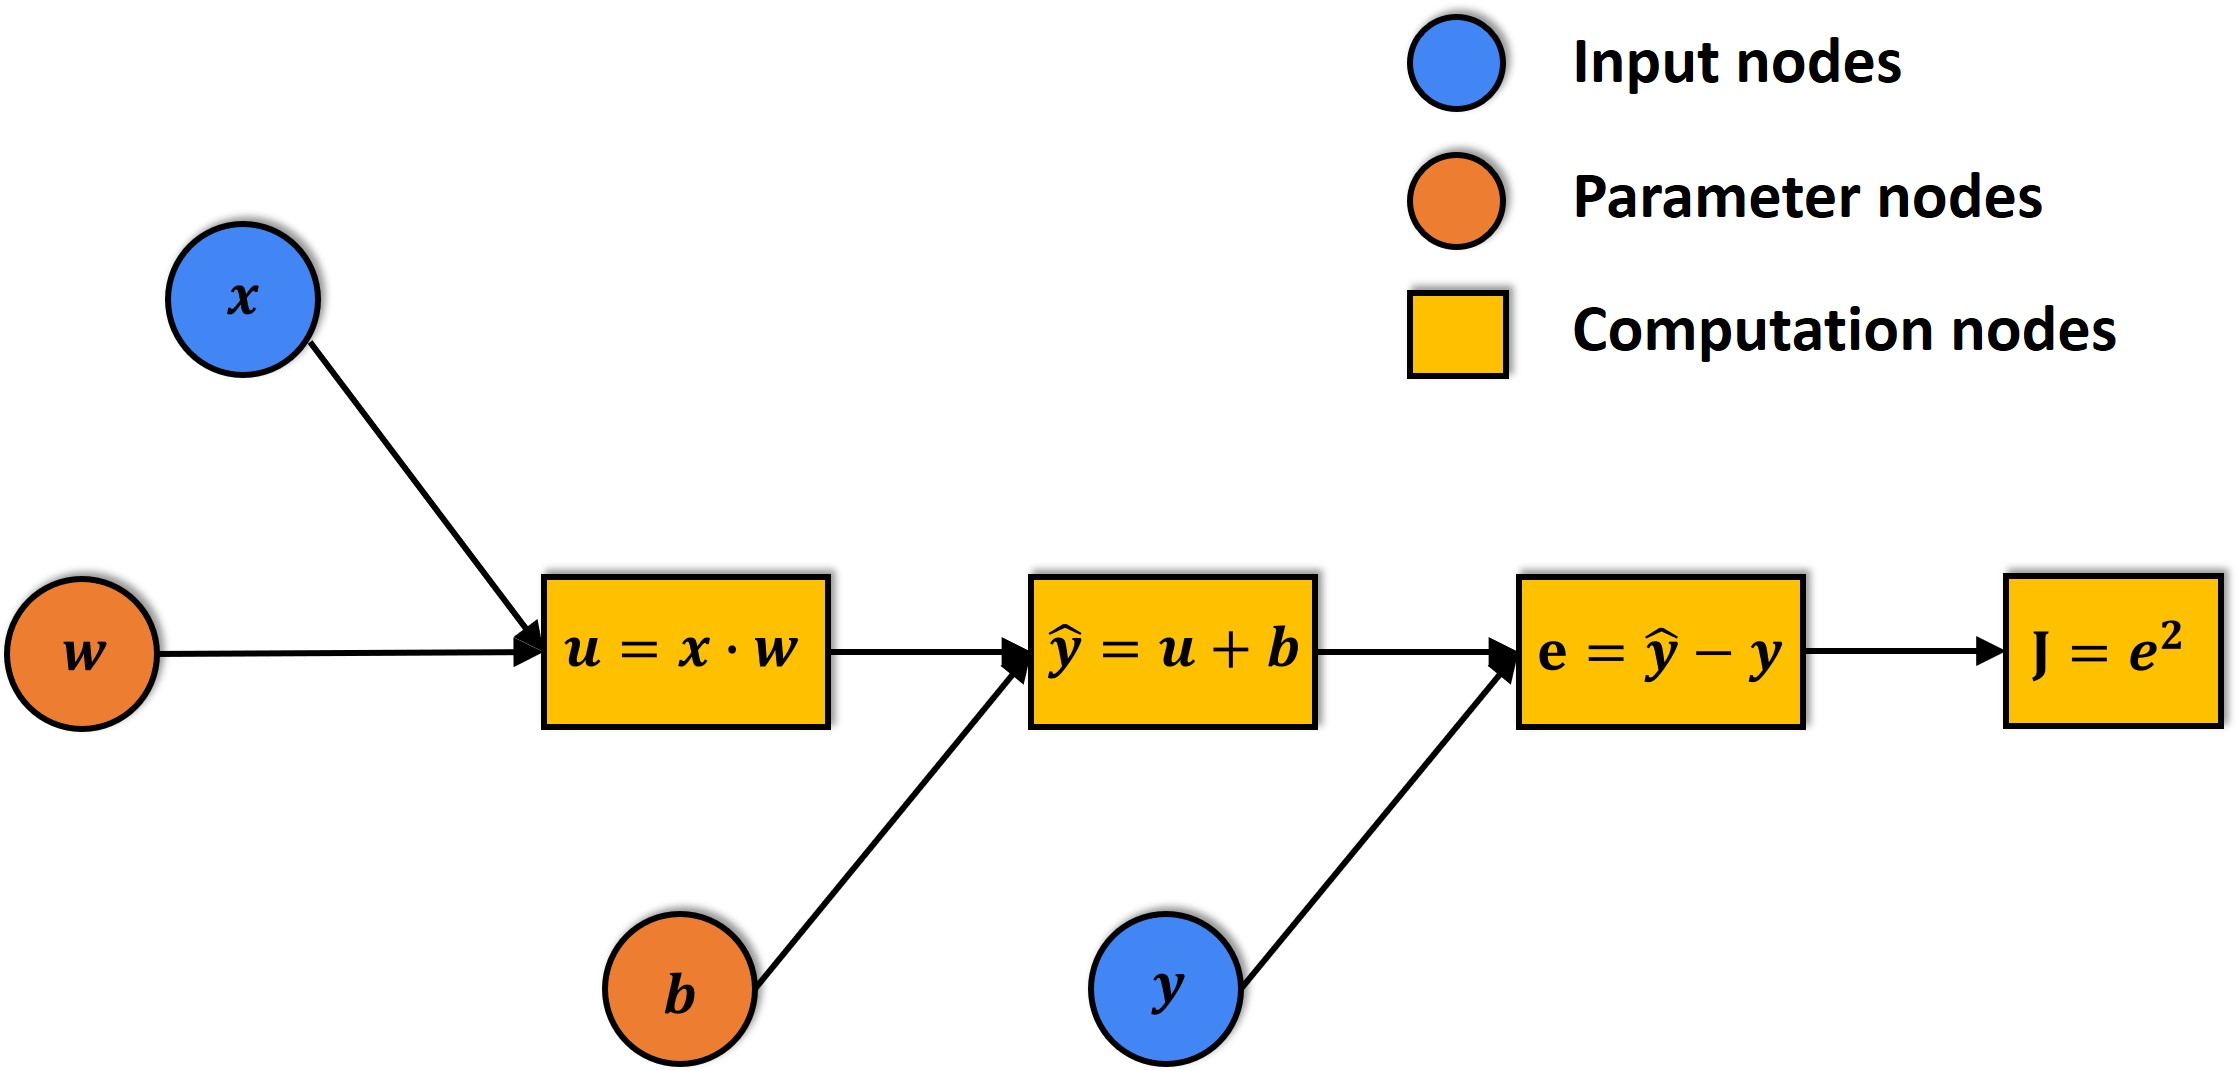

In [2]:
def f_forward(y,b):
    """
    Computes the forward pass of f(y,b) = y + b.
    """
    return y + b

def f_backward(y,b):
    """
    Computes the backward pass of f(y,b) = y + b.
    - ∂f/∂y = 1
    - ∂f/∂b = 1

    """
    grad_y = 1
    grad_b = 1
    return grad_y, grad_b

In [3]:
y_val,b_val = 2.0, 3.0
out_val = f_forward(y_val, b_val)
print(f"Forward example output: {out_val} (expected 5)")

grad_x_ex, grad_y_ex = f_backward(y_val,b_val)
print(f"Backward example gradients: dx={grad_x_ex} (expected 1), dy={grad_y_ex} (expected 1)")


Forward example output: 5.0 (expected 5)
Backward example gradients: dx=1 (expected 1), dy=1 (expected 1)


# Follow-Up Exercise

Now implement `forward` and `backward` of the function $$ g(x,w,b)=w \cdot x + b $$. Replace each `_____` so that the tests below produce the expected results.

1. `forward(x,w,b)` should return $$w \cdot x + b$$
2. `backward(x,w,b)` should compute:
    - `grad_x = w `
    - `grad_w = x `
    - `grad_b = 1 `

In [4]:
def g_forward(x,w,b):
    """
    Computes the forward pass of g(x,w,b) = w*x+b.
    """
    return w*x+b

def g_backward(x,w,b):
    """
    Computes the backward pass of g(x,w,b) = w*x+b.
    - ∂g/∂x = w
    - ∂g/∂w = x
    - ∂g/∂b = 1

    """
    grad_x = w
    grad_w = x
    grad_b = 1
    return grad_x, grad_w, grad_b

In [5]:
x_val, w_val, b_val = 2.0, 3.0, 4.0
out_ex = g_forward(x_val, w_val, b_val)
print(f"Forward output: {out_ex} (expected 10)")

grad_x, grad_w, grad_b = g_backward(x_val, w_val, b_val)
print(f"Gradients: dx={grad_x} (expected 3), dw={grad_w} (expected 2), db={grad_b} (expected 1)")


Forward output: 10.0 (expected 10)
Gradients: dx=3.0 (expected 3), dw=2.0 (expected 2), db=1 (expected 1)


# Sigmoid function
The function $$ σ(y)=\frac{1}{1+e^{-y}} $$ is called Sigmoid. Its derivative is
$$ \frac{\partial \sigma}{\partial y} =  σ(y) \cdot (1-σ(y))$$

In [6]:
def sigmoid_forward(y):
  return 1/(1+np.exp(-y))

# Activation function
Let's now look at another example. Let's code the forward and backward function of
$$ h(x,w,b) = \frac{1}{1+e^{-(w*x+b)}} $$



In [7]:
def h_forward(x,w,b):
  """
    Computes the forward pass of h(x,w,b).
  """
  return sigmoid_forward(w*x+b)

def h_backward(x,w,b):
  """
    Computes the backward pass of h(x,w,b) .
    - ∂h/∂x = ∂σ/∂y * ∂y/∂x
    - ∂g/∂w = ∂σ/∂y * ∂y/∂w
    - ∂g/∂b = ∂σ/∂y * ∂y/∂b

  """
  y = w*x+b
  ds_dy = sigmoid_forward(y) * (1-sigmoid_forward(y))
  return ds_dy * w, ds_dy * x, ds_dy * 1

In [8]:
x_val, a_val, b_val = 2.0, 3.0, 4.0
out_ex = h_forward(x_val, a_val, b_val)
print(f"Forward output: {out_ex}")

grad_x, grad_a, grad_b = h_backward(x_val, a_val, b_val)
print(f"Gradients: dx={grad_x}, da={grad_a}, db={grad_b}")

Forward output: 0.9999546021312976
Gradients: dx=0.00013618742320772295, da=9.079161547181531e-05, db=4.5395807735907655e-05


Now implement the `backward` function of a Sigmoid. Then use the `sigmoid_backward` in the `h_backward` function

In [9]:
def sigmoid_forward(y):
  return 1/(1+np.exp(-y))

def sigmoid_backward(y):
  return sigmoid_forward(y) * (1-sigmoid_forward(y))

In [10]:
y_val = 3.0
out_ex = sigmoid_forward(y_val)
print(f"Forward output: {out_ex} (expected 0.95...)")

grad_y = sigmoid_backward(y_val)
print(f"Gradients: dx={grad_y} (expected 0.045...)")

Forward output: 0.9525741268224334 (expected 0.95...)
Gradients: dx=0.045176659730912 (expected 0.045...)


Now implement the forward and backward functions of `h(x,a,b)` using the σ-function declared previously.

In [11]:
def h_forward(x,w,b):
  """
    Computes the forward pass of h(x,w,b) = sigmoid_forward(w*x+b).
  """
  return sigmoid_forward(w*x+b)

def h_backward(x,w,b):
  """
    Computes the backward pass of h(x,w,b) .
    - ∂h/∂x = ∂σ/∂y * ∂y/∂x
    - ∂g/∂w = ∂σ/∂y * ∂y/∂w
    - ∂g/∂b = ∂σ/∂y * ∂y/∂b

  """
  y = w*x+b
  return sigmoid_backward(y) * w, sigmoid_backward(y) * x, sigmoid_backward(y) * 1

In [12]:
x_val, a_val, b_val = 2.0, 3.0, 4.0
out_ex = h_forward(x_val, a_val, b_val)
print(f"Forward output: {out_ex} (expected 10)")

grad_x, grad_a, grad_b = h_backward(x_val, a_val, b_val)
print(f"Gradients: dx={grad_x} (expected 3), da={grad_a} (expected 2), db={grad_b} (expected 1)")

Forward output: 0.9999546021312976 (expected 10)
Gradients: dx=0.00013618742320772295 (expected 3), da=9.079161547181531e-05 (expected 2), db=4.5395807735907655e-05 (expected 1)


# Summary
Machine Learning, from an operational standpoint, is about forward and backward functions.

The  sigmoid function is an activation function. Other types of activations functions typically used in ML are ReLU, PReLU, LeakyReLU, etc.

The parameters w and b are usually called the weights and biases and x is the input.

A neural network is a concatenation of a set of operations like:

0.- Start with x

1a.- Multiply by $w_1$

1b.- Add a bias $b_1$

1c.- Apply an activation function σ

2a.- Multiply by $w_2$

2b.- Add a bias $b_2$

2c.- Apply an activation function σ

...

Obtain output $\hat{x}$

We then use a metric, usually called the Loss function, to compare the input with the output: $$L(x,\hat{x}(\lbrace w_i \rbrace, \lbrace b_i \rbrace))$$


# <a id="section2"></a>
# 2. Stochastic gradient descent

**Stochastic Gradient Descent** updates parameters $\theta = \lbrace w_i, b_i \rbrace$ by moving them in the direction opposite to the gradient of the loss:


$$ \theta_{t+1} = \theta_t \;-\; \eta \,\nabla_\theta L(\theta_t),$$


where $\eta$ is the learning rate.

*(⭐ Why is it Stochastic? )*



We’ll implement a simple scalar version that takes a list of parameters and a list of corresponding gradients.

### Worked Example

In `sgd_update_example`, we fully implement:

$$ \theta_{t+1} = \theta_t \;-\; \eta \,\nabla_\theta L(\theta_t),$$

For this we need to define a Loss function and the Loss backward function.

Let use use Mean Squred Error: $$ L(x,\hat{x}) = \frac{1}{N}\sum_{\alpha=1}^N (x^{(\alpha)} - \hat{x}^{(\alpha)}) $$

In [13]:
def loss_forward(x_input,y_label,w,b):
  return np.sum(np.square(h_forward(x_input,w,b)-y_label))

def loss_backward(x_input,y_label,w,b):
  grad_x = 2 * (h_forward(x_input,w,b)-y_label)
  return np.sum(h_backward(x_input,w,b)[1] * grad_x), np.sum(h_backward(x_input,w,b)[2] * grad_x)

In [14]:
def sgd_update_example(x_input, y_label, w, b, lr):
    """
    Updates parameters using SGD.
    """
    grad_w, grad_b = loss_backward(x_input, y_label, w, b)
    updated_w = w - lr * grad_w
    updated_b = b - lr * grad_b
    return updated_w, updated_b

## Summary

Stochastic gradient descent is an heuristic method to optimize data-driven models, such as Neural Networks.

## Logistic Regression

A logistic regression is typically used in Machine Learning in the task of training a classifier e.g., to classify dogs and cats.

Here we will consider a very simple example where we will train a 1-layer Neural Net to classify random number between 0 and 1 as 0 if the number is less than 0.5, and 1 otherwise.

<ipython-input-15-2002229731>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


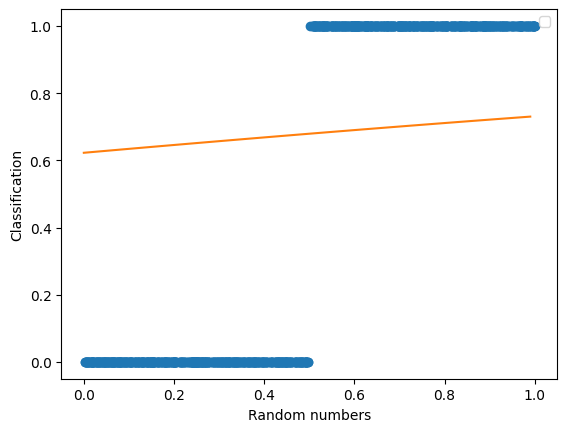

In [15]:
dataset_size = 1000

x_input = np.concatenate((np.random.rand(dataset_size//2) * 0.5, np.random.rand(dataset_size//2) * 0.5 + 0.5))
y_label = np.concatenate((np.zeros(dataset_size//2), np.ones(dataset_size//2)))

x_input_val = np.concatenate((np.random.rand(dataset_size//2) * 0.5, np.random.rand(dataset_size//2) * 0.5 + 0.5))
y_label_val = np.concatenate((np.zeros(dataset_size//2), np.ones(dataset_size//2)))

x_input_test = np.concatenate((np.random.rand(dataset_size//2) * 0.5, np.random.rand(dataset_size//2) * 0.5 + 0.5))
y_label_test = np.concatenate((np.zeros(dataset_size//2), np.ones(dataset_size//2)))

w=0.5
b=0.5
lr=0.1

plt.plot(x_input_test, y_label_test, 'o')
plt.plot([i for i in np.arange(0,1.0,0.01)], [h_forward(i,w,b) for i in np.arange(0,1.0,0.01)])
plt.ylabel("Classification")
plt.xlabel("Random numbers")
plt.legend()
plt.show()

In [16]:
loss_train, loss_val = [], []
for i in range(1000):
  w,b = sgd_update_example(x_input, y_label, w, b, lr)
  loss_val.append(loss_forward(x_input_val,y_label_val,w,b))
  loss_train.append(loss_forward(x_input,y_label,w,b))

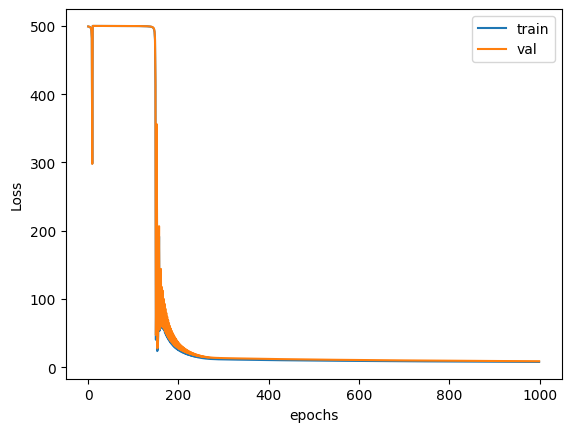

In [18]:
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val')
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

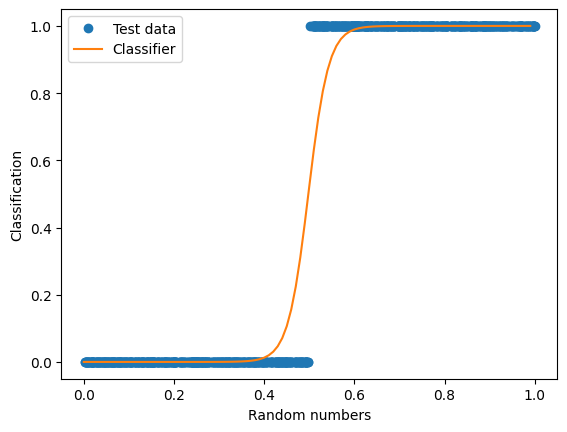

In [19]:
plt.plot(x_input_test, y_label_test, 'o', label="Test data")
plt.plot([i for i in np.arange(0,1.0,0.01)], [h_forward(i,w,b) for i in np.arange(0,1.0,0.01)], label="Classifier")
plt.ylabel("Classification")
plt.xlabel("Random numbers")
plt.legend()
plt.show()

## ⭐ Can you think of another loss function to use for this task?

In [ ]:
dataset_size = 1000

x1_input = (np.random.rand(dataset_size) - 0.5)*2
x2_input = (np.random.rand(dataset_size) - 0.5)*2
x_input = np.concatenate((np.expand_dims(x1_input,axis=1), np.expand_dims(x2_input,axis=1)), axis=1)
# y_label = np.concatenate((np.zeros(dataset_size//2), np.ones(dataset_size//2)))

## Linear regression

**Linear Regression** is a statistical method used to model the relationship between two variables: a dependent variable and an independent variable. This relationship is represented by a straight line, known as the regression line. The goal is to find the best-fitting line that minimizes the difference between the observed values of the dependent variable and the values predicted by the line. This line can be used to understand the strength of the relationship between the variables and to predict the value of the dependent variable for a given value of the independent variable.

In this specific example, we are performing a simple linear regression where we are trying to model a non-linear relationship between `x_input` (our independent variable) and `y_target` (our dependent variable). We are using a 1-layer neural network with a single weight (`w`) and bias (`b`) to learn this relationship. The target relationship is `y = 1 / (3.5 * (1 + x)**2)`, which is a non-linear function. While a single linear layer cannot perfectly model this non-linear relationship, the code attempts to find the best linear approximation using Stochastic Gradient Descent (SGD).

The code then visualizes the target data (`y_target`), the validation data (`y_val`), and the current prediction of the linear model (`h_forward(i,w,b)`). It also tracks the training and validation loss over iterations of SGD to see how well the model is learning.

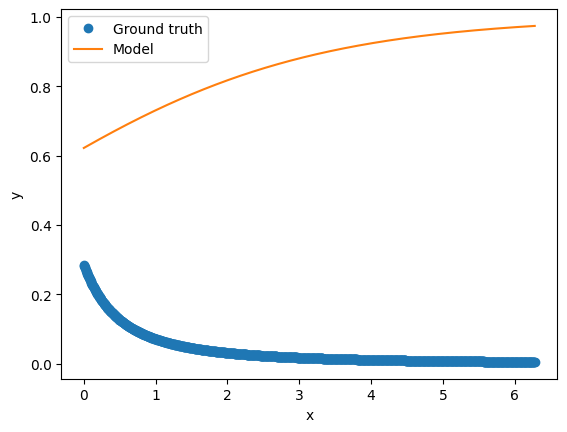

In [20]:
dataset_size = 1000
x_input = np.array([i for i in np.arange(0,2*np.pi, 2*np.pi/dataset_size)])
y_target = 1/( 3.5*(1+x_input)**2)

x_val = np.array([i for i in np.arange(0,2*np.pi, 2*np.pi/dataset_size)])
y_val = 1/( 3.5*(1+x_val)**2)

w=0.5
b=0.5
lr=0.001

plt.plot(x_val,y_val, 'o', label="Ground truth")
plt.plot([i for i in np.arange(0,2*np.pi,0.01)], [h_forward(i,w,b) for i in np.arange(0,2*np.pi,0.01)], label="Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

In [21]:
loss_train, loss_val = [], []
for i in range(1000):
  w,b = sgd_update_example(x_input, y_target, w, b, lr)
  loss_val.append(loss_forward(x_val,y_val,w,b))
  loss_train.append(loss_forward(x_input,y_target,w,b))

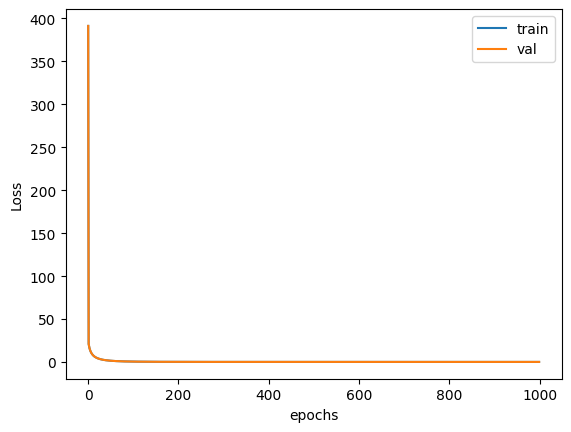

In [22]:
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val')
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

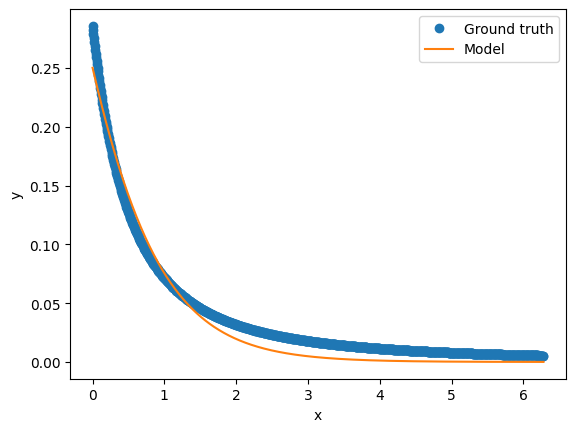

In [23]:
plt.plot(x_val,y_val, 'o', label="Ground truth")
plt.plot([i for i in np.arange(0,2*np.pi,0.01)], [h_forward(i,w,b) for i in np.arange(0,2*np.pi,0.01)], label="Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

## Fully-connected layer

The previous examples shows at its core what deep learning is about. However, to build more complex models we can use Pytorch which brings by default automatic differentiation, making the coding way simpler.

To introduce fully connected layers, we will consider a simple example where we have a set of random numbers x1 and x2, uniformly sampled between -1 and 1, and we wish to classify them as 0 if $x1^2 + x2^2 \leq 1$, and 1 otherwise.

In [46]:
dataset_size = 1000

x1_input = (np.random.rand(dataset_size) - 0.5)*2
x2_input = (np.random.rand(dataset_size) - 0.5)*2
x_input = np.concatenate((np.expand_dims(x1_input,axis=1), np.expand_dims(x2_input,axis=1)), axis=1)
y_target = np.where(x_input[:,0]**2 + x_input[:,1]**2 <= 1, 0, 1)


x1_input_val = (np.random.rand(dataset_size) - 0.5)*2
x2_input_val = (np.random.rand(dataset_size) - 0.5)*2
x_input_val = np.concatenate((np.expand_dims(x1_input_val,axis=1), np.expand_dims(x2_input_val,axis=1)), axis=1)
y_target_val = np.where(x_input_val[:,0]**2 + x_input_val[:,1]**2 <= 1, 0, 1)

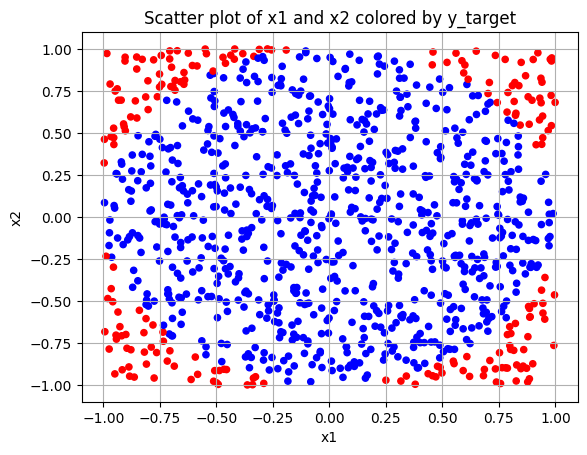

In [52]:
plt.scatter(x_input_val[:,0], x_input_val[:,1], c=y_target_val, cmap='bwr', s=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2 colored by y_target')
plt.grid(True)
plt.show()

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

# We'll set the seed to 0 for reproducibility purposes
torch.manual_seed(0)

# X: N points in 2D
X = torch.tensor(x_input).float()
X_val = torch.tensor(x_input_val).float()
# Y: label is 1 if x₁ + x₂ > 0, else 0
Y = torch.tensor(y_target).float().unsqueeze(1)
Y_val = torch.tensor(y_target_val).float().unsqueeze(1)


In [113]:
# This model maps a 2D vector to a 10D vector, then applies an activation function
# max(0,x), then maps the 10D vector to a 5D vector followed by the activation
# function max(0,x). It then applies another mapping to a 1D vector
# and finally is fed to a Sigmoid
model = nn.Sequential(
    nn.Linear(2, 10),   # maps 2D → 1D logit
    nn.ReLU(),       # logistic sigmoid
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid(),
)

In [114]:
# Here we will use a binary cross entropy loss function, which measures the "mix"
# entropy between the predicted label and the ground truth label
criterion = nn.BCELoss()               # binary cross-entropy
# Once we have set up the model and the loss function, updating the parameters
# of the model is done by the optimizer. We only need to specify the learning rate
# lr. Notice we are not explicitly initializing the weights and biases of our network.
# This is done by default by pytorch.
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [115]:
# Training loop
# num_epochs = 500
# for epoch in range(1, num_epochs + 1):
loss_train, loss_val = [], []
for epoch in range(2000):
    optimizer.zero_grad()
    logits = model(X)                  # forward pass
    loss = criterion(logits, Y)        # compute loss
    loss.backward()                    # backprop
    optimizer.step()                   # update weights
    loss_train.append(loss.item())

    with torch.no_grad():
      loss_val.append(criterion(model(X_val), Y_val).item())

    # if epoch % 100 == 0:
    #     print(f"Epoch {epoch:3d} – Loss: {loss.item():.4f}")


In [116]:
# Evaluate on the val set
with torch.no_grad():
    preds = (model(X) >= 0.5).float()
    accuracy = (preds.eq(Y).sum() / dataset_size).item()
    print(f"Training accuracy: {accuracy:.1f}%")

Training accuracy: 1.0%


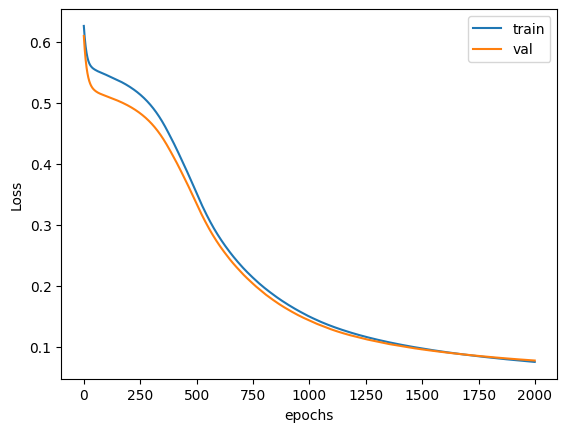

In [117]:
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val')
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

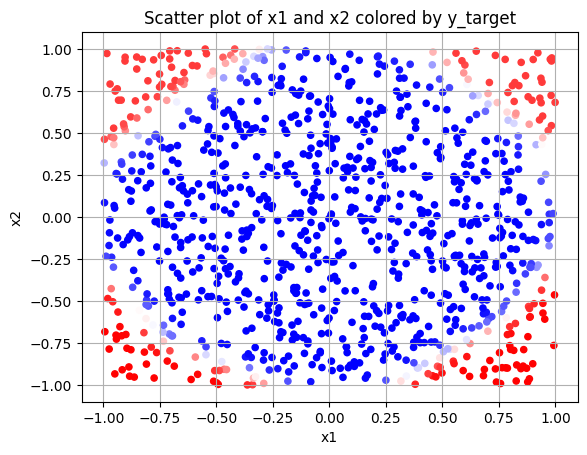

In [118]:
with torch.no_grad():
  plt.scatter(x_input_val[:,0], x_input_val[:,1], c=model(X_val).view(-1), cmap='bwr', s=20)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Scatter plot of x1 and x2 colored by y_target')
  plt.grid(True)
  plt.show()

## Convolutional Network

Here we'll train a convolutional neural network to classify images of numbers.

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# # Prepare a fake image dataset
# transform = transforms.Compose([
#     transforms.ToTensor()
# ])

# # FakeData generates random images for quick testing
# train_dataset = datasets.FakeData(
#     size=500,                   # total samples
#     image_size=(3, 32, 32),     # 3×32×32 RGB images
#     num_classes=2,              # binary classification
#     transform=transform
# )
# 1) Prepare the MNIST dataset (digits 0 & 1 only)
transform = transforms.Compose([
    transforms.ToTensor(),            # convert PIL → [0,1] tensor
    transforms.Normalize((0.5,), (0.5,))  # optional: center at 0
])

# Download/train split
full_train = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Filter to keep only labels 0 or 1
mask = (full_train.targets == 0) | (full_train.targets == 1)
indices = torch.nonzero(mask, as_tuple=True)[0]
train_dataset = Subset(full_train, indices)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [130]:
# 2) Define the same SimpleCNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # MNIST is 1-channel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2)
        self.relu  = nn.ReLU()
        self.fc1   = nn.Linear(32 * 7 * 7, 64)  # after two 2×2 pools: 28→14→7
        self.fc2   = nn.Linear(64, 2)           # 2 output classes: {0,1}

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # →16×14×14
        x = self.pool(self.relu(self.conv2(x)))  # →32×7×7
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleCNN()

In [131]:
# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)               # raw logits
        loss = criterion(outputs, labels)     # computes softmax + NLL
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch}/{num_epochs} — Loss: {avg_loss:.4f}")




Epoch 1/5 — Loss: 0.0190
Epoch 2/5 — Loss: 0.0023
Epoch 3/5 — Loss: 0.0010
Epoch 4/5 — Loss: 0.0003
Epoch 5/5 — Loss: 0.0011


In [132]:
# Simple training-set evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, preds = outputs.max(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"Training accuracy: {100 * correct/total:.1f}%")

Training accuracy: 99.9%
